In [1]:
librarian::shelf(tidyverse, tidymodels, DataExplorer, GGally, corrplot, plotly, viridis,
pROC, randomForest, factoextra, cluster, ggthemes, ggridges, scales, vcd, kableExtra, DT, 
MASS, Rtsne, tsne, umap, conflicted)

In [2]:
conflicted::conflicts_prefer(dplyr::select)
tidymodels_prefer()

[conflicted] Will prefer dplyr::select over any other package.


In [4]:
loan_data <- read_csv("dataset/Loan_Default.csv")

Rows: 148670 Columns: 34
── Column specification ──────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (21): loan_limit, Gender, approv_in_adv, loan_type, loan_purpose, Credit_Worthiness, open_credit, busi...
dbl (13): ID, year, loan_amount, rate_of_interest, Interest_rate_spread, Upfront_charges, term, property_v...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
cat("Dimensions of the dataset", dim(loan_data)[1], "rows and ", dim(loan_data)[2], " columns")

Dimensions of the dataset 148670 rows and  34  columns

In [6]:
head(loan_data)

# A tibble: 6 × 34
     ID  year loan_limit Gender            approv_in_adv loan_type loan_purpose Credit_Worthiness open_credit
  <dbl> <dbl> <chr>      <chr>             <chr>         <chr>     <chr>        <chr>             <chr>      
1 24890  2019 cf         Sex Not Available nopre         type1     p1           l1                nopc       
2 24891  2019 cf         Male              nopre         type2     p1           l1                nopc       
3 24892  2019 cf         Male              pre           type1     p1           l1                nopc       
4 24893  2019 cf         Male              nopre         type1     p4           l1                nopc       
5 24894  2019 cf         Joint             pre           type1     p1           l1                nopc       
6 24895  2019 cf         Joint             pre           type1     p1           l1                nopc       
# ℹ 25 more variables: business_or_commercial <chr>, loan_amount <dbl>, rate_of_interest <dbl>,
#   I

In [7]:
skimr::skim(loan_data) %>% 
  as.tibble() %>% 
  kable(caption = "Summary Statistics of the loan data")

Warning message:
`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 




Table: Summary Statistics of the loan data

|skim_type |skim_variable             | n_missing| complete_rate| character.min| character.max| character.empty| character.n_unique| character.whitespace| numeric.mean|   numeric.sd|    numeric.p0|  numeric.p25|  numeric.p50|  numeric.p75| numeric.p100|numeric.hist |
|:---------|:-------------------------|---------:|-------------:|-------------:|-------------:|---------------:|------------------:|--------------------:|------------:|------------:|-------------:|------------:|------------:|------------:|------------:|:------------|
|character |loan_limit                |      3344|     0.9775072|             2|             3|               0|                  2|                    0|           NA|           NA|            NA|           NA|           NA|           NA|           NA|NA           |
|character |Gender                    |         0|     1.0000000|             4|            17|               0|                  4|                  

In [8]:
# Convert all character variables to factors

loan_data <- loan_data %>% mutate_if(is.character, as.factor)

In [9]:
loan_data %>% 
  janitor::clean_names() -> loan_data


## Missing Data Analysis


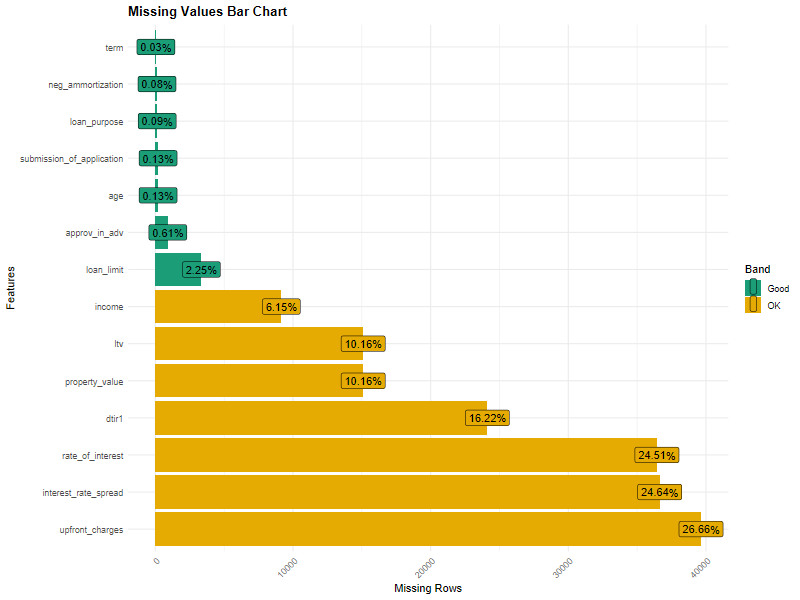

In [10]:
plot_missing(loan_data, missing_only = TRUE, title = "Missing Values Bar Chart") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"))

In [11]:
# Function to find mode
find_mode <- function(x) {
  uniq_x <- unique(na.omit(x))
  uniq_x[which.max(tabulate(match(na.omit(x), uniq_x)))]
}

# Impute missing values
loan_data_imputed <- loan_data %>%
  mutate(across(where(is.numeric), ~ifelse(is.na(.), median(., na.rm = TRUE), .)),
         across(where(is.factor), ~as.factor(ifelse(is.na(.), as.character(find_mode(.)), as.character(.)))))

# Check if imputation was successful
any(is.na(loan_data_imputed))

[1] FALSE